# Tutorial 2: Feature importance, and some scatter plots (GS)

---

The aim of this notebook, is to reorder the 2074 columns according to their importance

First, let us recall the data from the previous notebook

In [1]:
%store -r df_input_GD
%store -r y_GD
%store -r df_GD


<b><i> Data splitting </i></b> 

In [2]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_GD, y_GD, test_size = 0.3, random_state=3, stratify=y_GD) # train and valid sets

In [3]:
print(Xtrain.shape)
print(Xtest.shape)

(382, 2074)
(165, 2074)


---

<b><i> Permutation Importance </i></b> 

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from random import *
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
featImp_GD = [] # an empty list to store the important features

In [10]:
for i in range (1000): # we will take the average of 1000 permutations, with different sizes and random splits (you can increase the number for it to be more robust)
    print("itr: " + str(i))
    
    RandomStateValid = randrange(50)
    ranodmSplitValid = random.uniform(0.2, 0.5)
    XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( np.array(Xtrain), np.array(Ytrain), test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
    print("Train shape: "+str(XtrainPer.shape))
    print("Valid shape: "+str(XvalidPer.shape))
    print()
   
    # train
    model = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs = -1)
    model.fit(XtrainPer, YtrainPer)
    
    results = permutation_importance(model, XvalidPer, YvalidPer, scoring='precision_macro', n_repeats = 10, n_jobs = -1)
    importance = results.importances_mean
    # print(importance)

    featImp_GD.append(importance)

itr: 0
Train shape: (237, 2074)
Valid shape: (145, 2074)

itr: 1
Train shape: (257, 2074)
Valid shape: (125, 2074)

itr: 2
Train shape: (232, 2074)
Valid shape: (150, 2074)

itr: 3
Train shape: (264, 2074)
Valid shape: (118, 2074)

itr: 4
Train shape: (209, 2074)
Valid shape: (173, 2074)

itr: 5
Train shape: (296, 2074)
Valid shape: (86, 2074)

itr: 6
Train shape: (299, 2074)
Valid shape: (83, 2074)

itr: 7
Train shape: (210, 2074)
Valid shape: (172, 2074)

itr: 8
Train shape: (210, 2074)
Valid shape: (172, 2074)

itr: 9
Train shape: (194, 2074)
Valid shape: (188, 2074)

itr: 10
Train shape: (284, 2074)
Valid shape: (98, 2074)

itr: 11
Train shape: (215, 2074)
Valid shape: (167, 2074)

itr: 12
Train shape: (227, 2074)
Valid shape: (155, 2074)

itr: 13
Train shape: (249, 2074)
Valid shape: (133, 2074)

itr: 14
Train shape: (224, 2074)
Valid shape: (158, 2074)

itr: 15
Train shape: (270, 2074)
Valid shape: (112, 2074)

itr: 16
Train shape: (217, 2074)
Valid shape: (165, 2074)

itr: 17
Tr

In [14]:
%store featImp_GD

Stored 'featImp_GD' (list)


In [15]:
%store -r featImp_GD


In [16]:
np.array(featImp_GD).shape

(1000, 2074)

---

<b><i>Importance Graph </i></b> 

In [27]:
arrimp = np.array(featImp_GD).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-15:])

[ 202  106 2045   33   17   15  205  144  153   71  180  157   60   43
   86]


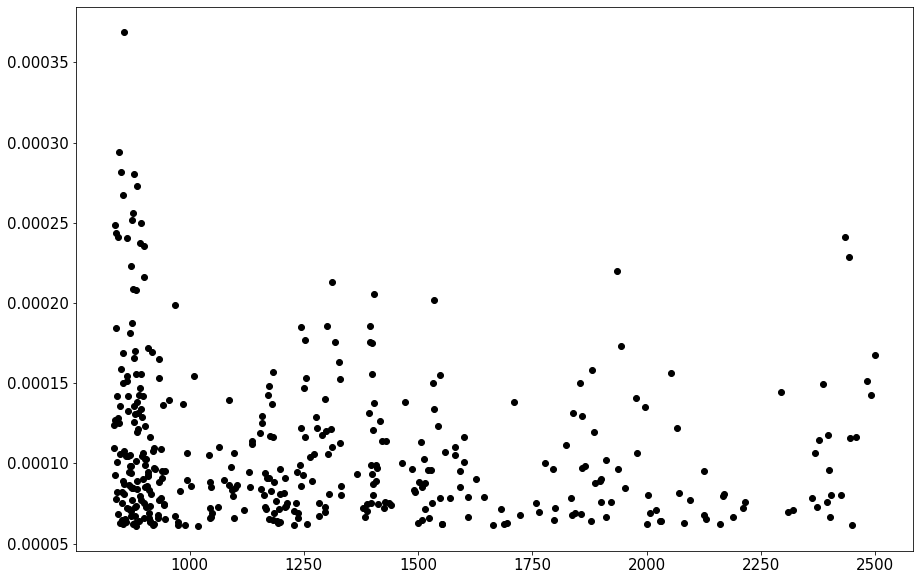

In [23]:
n = 400
rand  = np.random.randint(len(y_GD), size= n)

plt.rcParams["figure.figsize"] = (15,10)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.scatter(df_input_GD.columns[sorted_idx][-n:], arrimp[sorted_idx][-n:], color = 'black')
plt.show()

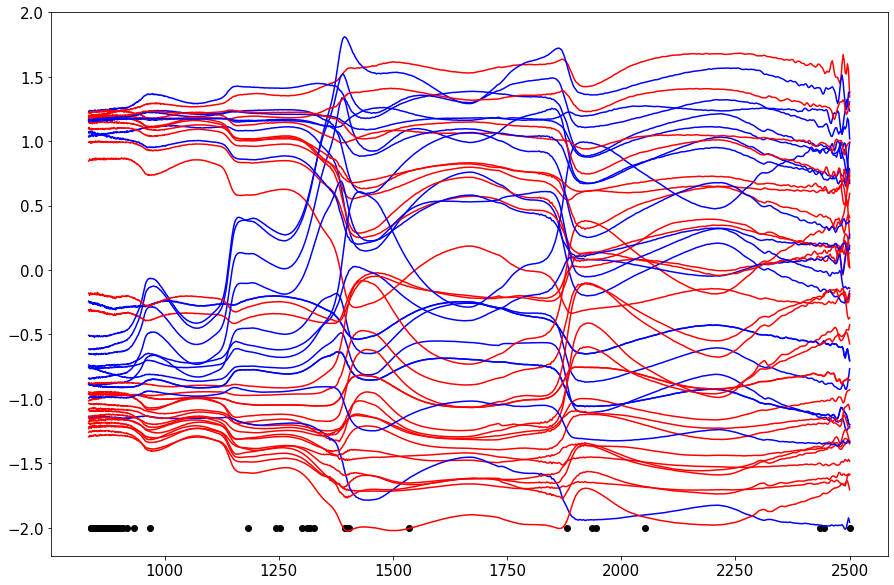

In [24]:
n = 50
rand  = np.random.randint(len(y_GD), size= n)

plt.rcParams["figure.figsize"] = (15,10)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
# plt.plot(df_input_GS.columns, df_input_GS.values.mean(0), color = 'red')
# plt.show()
for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input_GD.iloc[i]).flatten()
    
    if y_GD[i] == 'S':
        plt.plot(np.array(df_input_GD.columns), lineSpec, color = 'red')
    if y_GD[i] == 'B':
        plt.plot(np.array(df_input_GD.columns), lineSpec, color = 'blue')

plt.scatter(df_input_GD.columns[sorted_idx][-n:], arrimp[sorted_idx][-n:]-2, color = 'black')
plt.show()

---

<b><i>Scatter plt</i></b> 

In [28]:
df_perImp = pd.DataFrame()
df_perImp = df_input_GD[df_input_GD.columns[sorted_idx][-14:]]
df_perImp['Condition'] = y_GD
print(df_perImp.head(2))

    863.063  2434.404   842.587   838.229   837.687   892.475   874.121  \
0 -0.715038  0.529154 -0.724051 -0.726126 -0.725296 -0.706091 -0.710924   
1 -1.081872 -1.309696 -1.084790 -1.092951 -1.089633 -1.083544 -1.078932   

    876.781   853.123    884.86   877.969   850.046   845.334   857.355  \
0 -0.710426 -0.722464 -0.704631 -0.711831 -0.725658 -0.722083 -0.722298   
1 -1.077326 -1.083976 -1.080144 -1.082152 -1.084730 -1.078412 -1.085217   

  Condition  
0         B  
1         B  


/tmp/ipykernel_903605/2492819540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perImp['Condition'] = y_GD


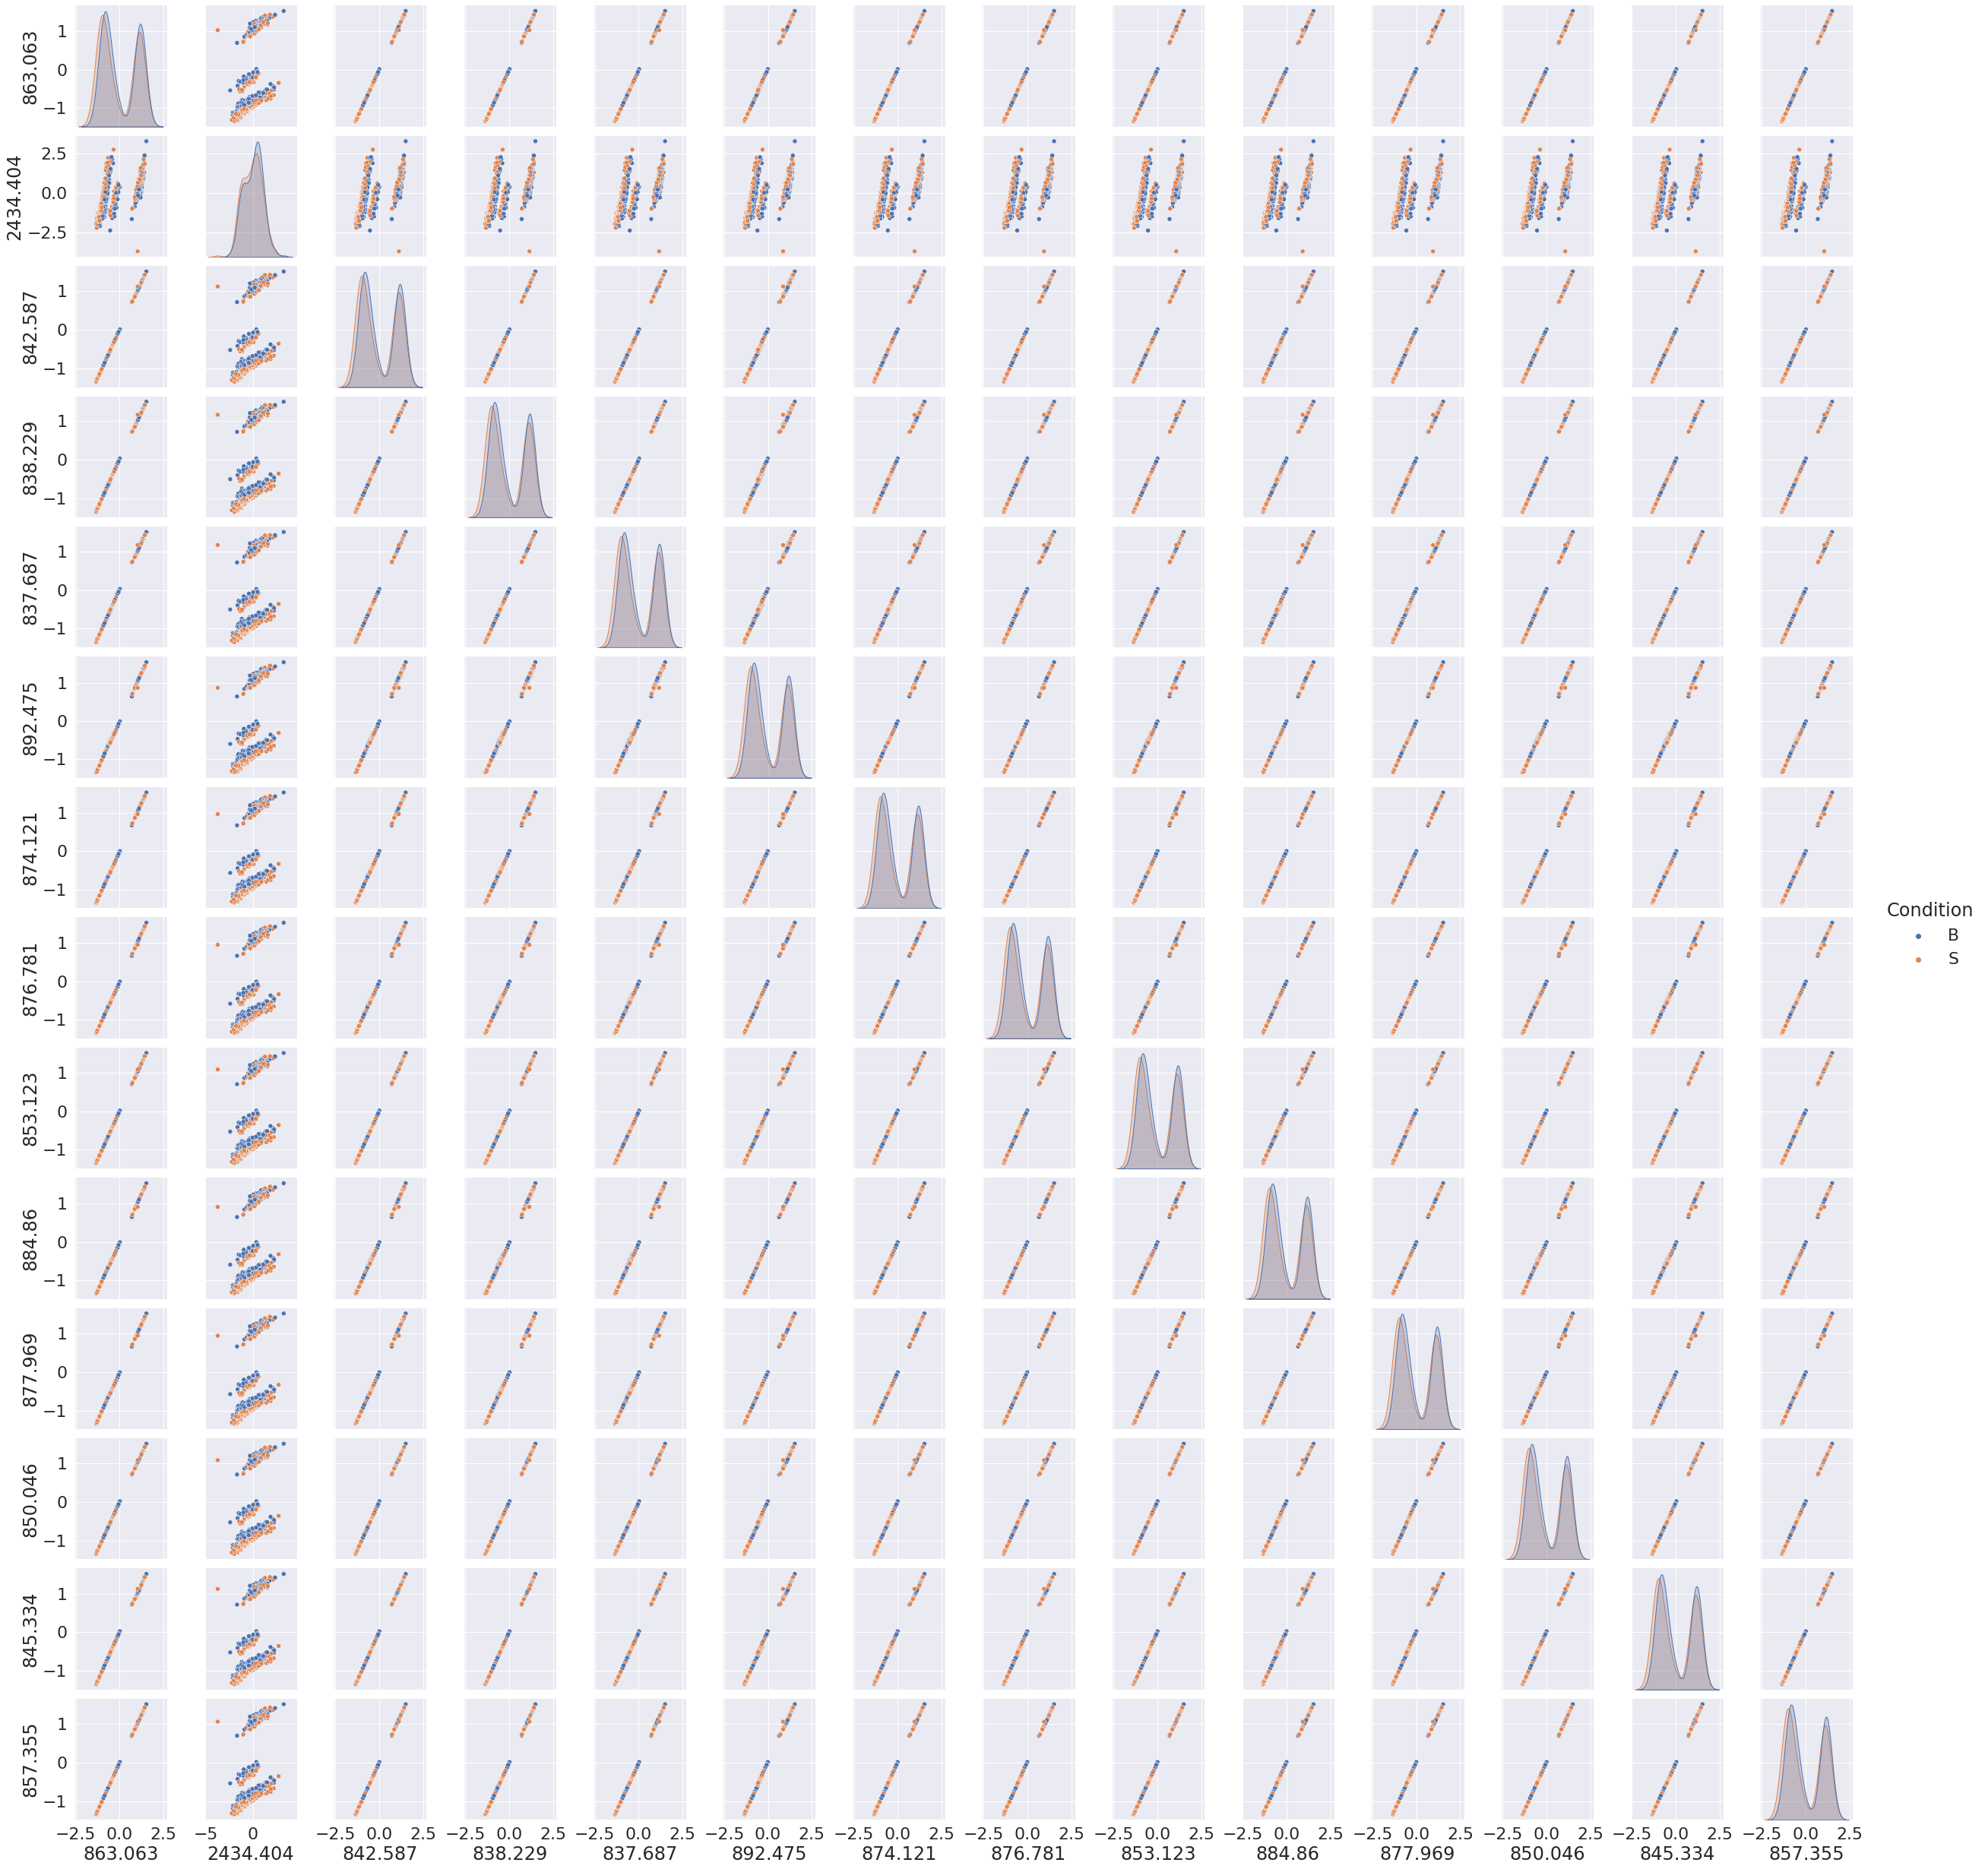

In [29]:
sns.set(font_scale=2)
sns.pairplot(df_perImp, hue="Condition")

---

### DONE

In [31]:
print(1)

1
